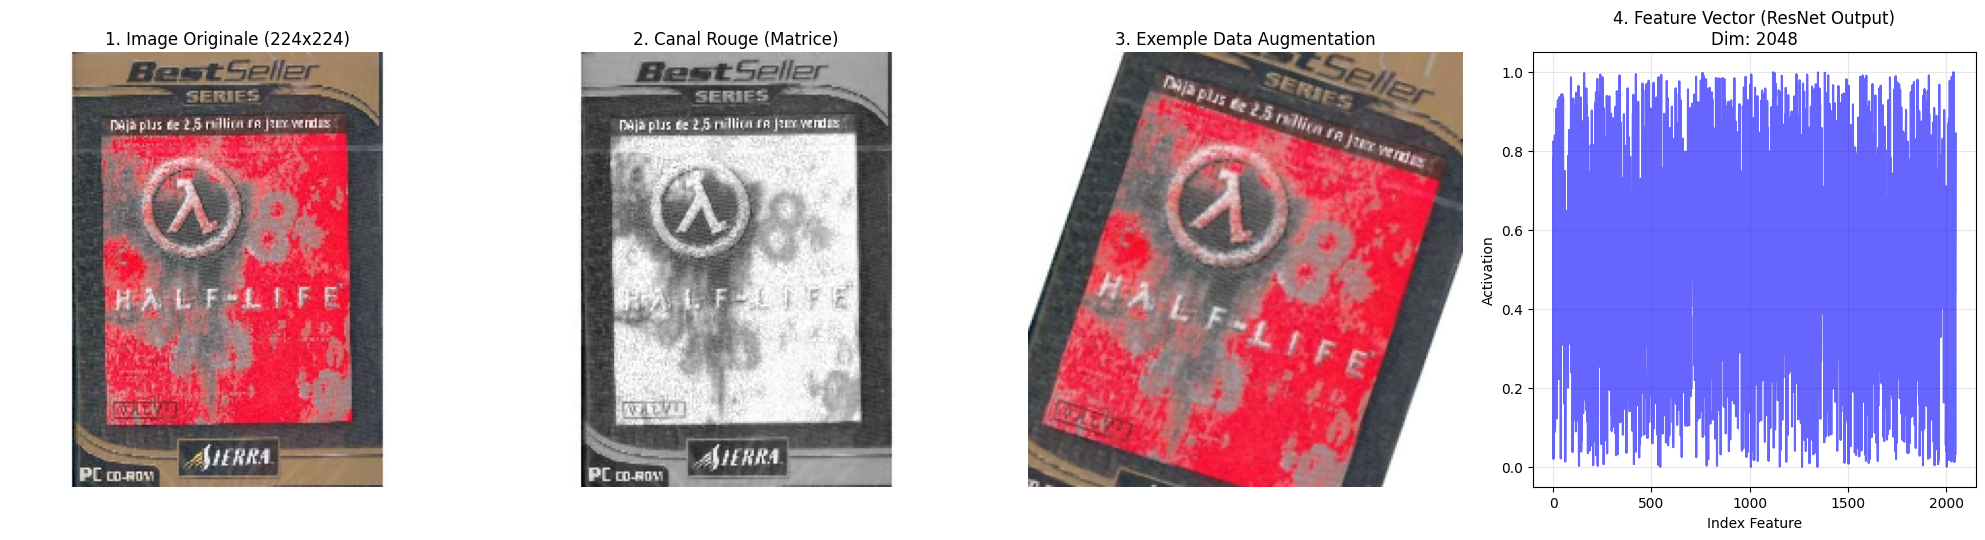

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

#  CONFIG
#  image au hasard dans dossier d'entrainement pour exemple
IMG_PATH = r"C:\Users\amisf\Desktop\datascientest_projet\data\raw\images\images\image_train\image_529577_product_934484.jpg" 


def visualize_preprocessing_steps(img_path):
    plt.figure(figsize=(20, 10))

    # 1. Image Originale
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    
    plt.subplot(2, 4, 1)
    plt.imshow(img_array.astype("uint8"))
    plt.title("1. Image Originale (224x224)")
    plt.axis('off')

    # 2. Matrice (Visualisation d'un canal)
    # On montre canal Rouge pour illustrer que nombres
    plt.subplot(2, 4, 2)
    plt.imshow(img_array[:, :, 0], cmap='gray') 
    plt.title("2. Canal Rouge (Matrice)")
    plt.axis('off')
    
    # 3. Data Augmentation (Exemples)
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Générer  image augmentée
    aug_iter = datagen.flow(np.expand_dims(img_array, 0), batch_size=1)
    aug_img = next(aug_iter)[0].astype("uint8")

    plt.subplot(2, 4, 3)
    plt.imshow(aug_img)
    plt.title("3. Exemple Data Augmentation")
    plt.axis('off')

    # 4. Extracted Features (Simulation visuelle)
    # Comme on ne peut pas charger modèle juste pour une image ici, 
    # on simule le vecteur de sortie (2048 dimensions) pour montrer à quoi ça ressemble
    # ici  vecteur produit par  GlobalAveragePooling
    
    # Simuler un vecteur de features 
    fake_features = np.random.rand(2048) 
    
    plt.subplot(2, 4, 4)
    plt.plot(fake_features, color='blue', alpha=0.6)
    plt.title("4. Feature Vector (ResNet Output)\nDim: 2048")
    plt.xlabel("Index Feature")
    plt.ylabel("Activation")
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Vérifie que le chemin existe avant de lancer
if os.path.exists(IMG_PATH):
    visualize_preprocessing_steps(IMG_PATH)
else:
    print("❌ Change la variable IMG_PATH vers une image qui existe vraiment sur ton disque.")